# Performance analysis

In [4]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiment import Experiment
from utils import eval_position


data_path = "../data"
save_path = "../figs"

In [2]:
exp = Experiment.load_experiment(data_path, 'baseline')

exp.compile_grid_cells(1)
exp.load_pfs()

net = exp.agent.actor
net.clamp_weights()

In [5]:
eval_position(exp.agent, exp.coords, exp.grid_cells)

7.726526e-05

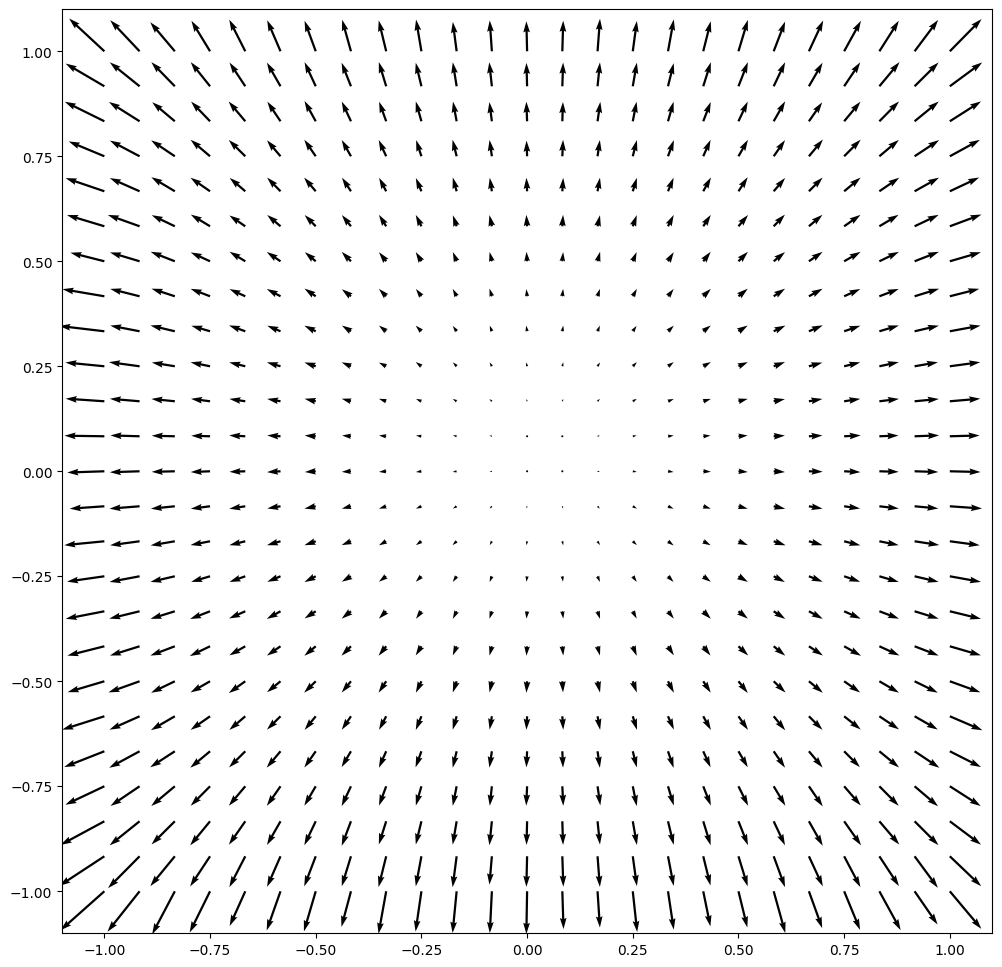

In [6]:
xy = np.linspace(-1, 1, 25)
X, Y = np.meshgrid(xy, xy)

plt.figure(figsize=(12, 12))
plt.quiver(X, Y, *net.lin2(net.lin1(exp.grid_cells))[::16,::16,2:].permute(-1, 0, 1).detach().cpu())
plt.show()

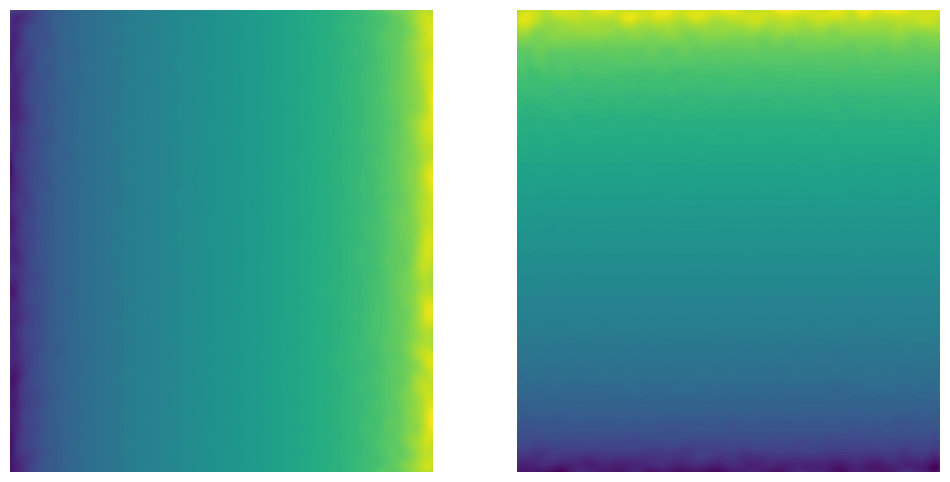

In [7]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.axis('off')
ax2.axis('off')
ax1.contourf(net.lin2(net.lin1(exp.grid_cells))[:,:,2].detach().cpu(), levels=100)
ax2.contourf(net.lin2(net.lin1(exp.grid_cells))[:,:,3].detach().cpu(), levels=100)
plt.show()